# Challenge 1

Do a function to simulate a rolling dice 10 times and save the information in a dataframe.
Plot the values sorted by value.
Calculate the frequency distribution and plot it. What is the relation between this plot and the other one? Describe it with words.

In [2]:
import random
import pandas as pd

In [3]:
def ten_rolls():
    rolls =[]
    for n in range(10):
        rolls.append(random.randint(1,6))
    dice_df = pd.DataFrame(rolls).rename(columns = {0:'roll'})
    return dice_df

In [4]:
import matplotlib.pyplot as plt

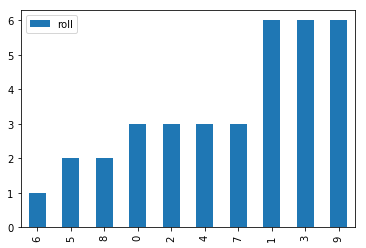

In [5]:
rolls = ten_rolls()
rolls.sort_values('roll').plot(kind='bar')

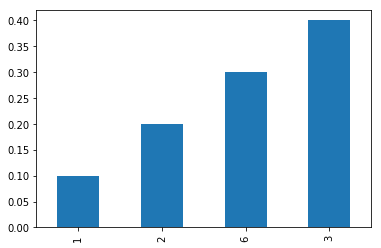

In [6]:
rolls['roll'].value_counts('roll',ascending=True).plot(kind='bar')

The first plot shows the sorted values obtained in each observation. In the second one we can see the frequency of each value for all observations

# Challenge 2

With the results of your dice of the challenge 1, define some functions to calculate the mean in two ways:

Summing all the observations separately (no method allowed!)
Calculate first the frequency distribution and then the mean with the values of the distribution (no other methods allowed!)
Define a function to calculate the median. No method allowed! *Hint: depending on the number of observations you need to define two cases.
Using your last function, use it to define a function that will calculate the four quartiles.


Method 1: 

In [102]:
def manual_mean_1(rolls):
    sum_roll = 0
    for roll in rolls['roll']:
        sum_roll += roll
    return sum_roll/len(rolls['roll'])

Method 2: Using the frequency table

In [99]:
def manual_mean_2(rolls):
    freq_table= pd.DataFrame(rolls['roll'].value_counts('roll'))
    freq_table = freq_table.reset_index().rename(columns={'index':'value'})
    return freq_table['value'].multiply(freq_table['roll']).sum()

In [86]:
rdf = rolls.sort_values('roll').reset_index()
rdf

,index,roll
0,2,1
1,6,1
2,9,3
3,1,4
4,7,4
5,8,4
6,0,5
7,3,6
8,4,6
9,5,6


In [94]:
if len(rolls.sort_values('roll'))%2 == 0:
    median = rdf.iloc[int((len(rolls.sort_values('roll'))/2) - 1)]['roll']
else:
    median = rdf.iloc[int((len(rolls.sort_values('roll'))/2) - 0.5)]['roll']
median    

4

# Challenge 3

Read the csv roll_the_dice_hundred.csv

Plot the values sorted. What do you see?
With the functions you defined in the challenge 2, calculate the mean of the rollings.
Calculate the frequency distribution.
Plot the histogram as we did during the lesson. What do you see? (shape, values...) how could you connect the value of the mean to the plot you see?
Now read the roll_the_dice_thousand.csv and plot the frequency distribution in the same way you did it before. What has changed? Why do you think it is changing?


In [112]:
roll3 = pd.read_csv('roll_the_dice_hundred.csv',index_col=0)

sum_roll = 0
for roll in roll3['value']:
    sum_roll += roll

sum_roll/len(roll3['value'])

3.74

In [105]:
roll3.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


In [107]:
roll3['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

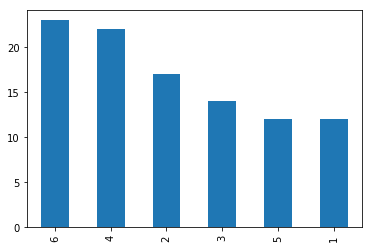

In [110]:
roll3['value'].value_counts().plot(kind='bar')

In [114]:
roll1000 = pd.read_csv('roll_the_dice_thousand.csv',index_col=0)
roll1000.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


In [116]:
sum_roll = 0
for roll in roll1000['value']:
    sum_roll += roll

sum_roll/len(roll1000['value'])

3.447

In [117]:
roll1000['value'].value_counts()

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

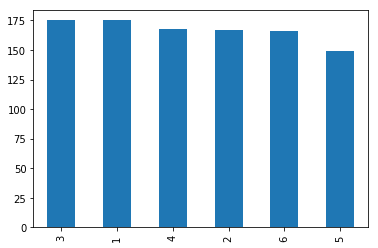

In [118]:
roll1000['value'].value_counts().plot(kind='bar')

# Challenge 4

In the ages_population files, we will find some information about a poll we did to a thousand people. Each file corresponds to a different neighbourhood.

Read the csv ages_population.csv. Here you have a poll we did to people from here in Barcelona about their ages. You will find each observation in the csv.

Calculate the frequency distribution and plot it as we did during the lesson. Define a range for the mean and std with the eye.
Calculate the mean and the standard deviation and compare it with your range. Does it fit?
Now read the csv ages_population2.csv and calculate the frequency distribution and plot it.
What do you see? Is there any difference?
Calculate the mean and std and compare with the last one. What do you think?

In [155]:
ages_df = pd.read_csv('ages_population.csv')

In [156]:
ages_df.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


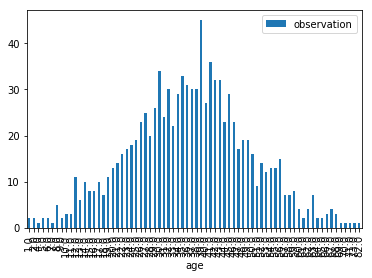

In [178]:
fdf = pd.DataFrame(ages_df['observation'].value_counts())
fdf.reset_index().rename(columns={'index':'age'}).sort_values('age').plot(kind='bar',x='age',y='observation')

In [179]:
ages_df.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [180]:
ages_df2 = pd.read_csv('ages_population2.csv')

In [181]:
ages_df2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


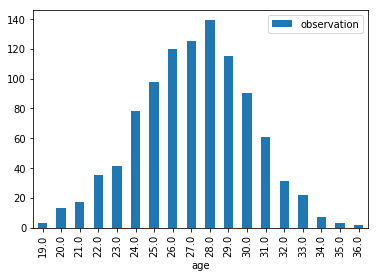

In [182]:
fdf2 = pd.DataFrame(ages_df2['observation'].value_counts())
fdf2.reset_index().rename(columns={'index':'age'}).sort_values('age').plot(kind='bar',x='age',y='observation')

In [183]:
ages_df2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


# Challenge 5

Now is the turn of ages_population3.csv.

Calculate the frequency distribution and plot it as we did during the lesson.
Calculate the mean and std and compare with the plot. What is happening?
Calculate the four quartiles and give some arguments for the last question using them. How much difference there is between median and mean?
Calculate some other percentiles that can be useful to give more arguments.


In [184]:
ages_df3 = pd.read_csv('ages_population3.csv')

In [185]:
ages_df3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


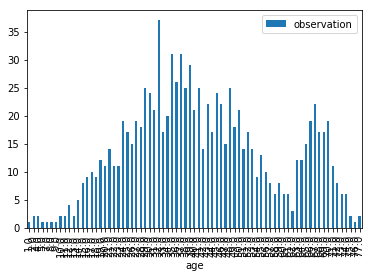

In [186]:
fdf3 = pd.DataFrame(ages_df3['observation'].value_counts())
fdf3.reset_index().rename(columns={'index':'age'}).sort_values('age').plot(kind='bar',x='age',y='observation')

In [187]:
ages_df3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [194]:
i=1
for n in range(9):
    i += 1
    q = ages_df3.quantile(q=i/10)
    print(q)

observation    28.0
Name: 0.2, dtype: float64
observation    32.0
Name: 0.3, dtype: float64
observation    36.0
Name: 0.4, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    45.0
Name: 0.6, dtype: float64
observation    50.0
Name: 0.7, dtype: float64
observation    57.0
Name: 0.8, dtype: float64
observation    67.0
Name: 0.9, dtype: float64
observation    77.0
Name: 1.0, dtype: float64


# Bonus challenge

Take the information about the 3 neighbourhoods and compare them. Prepare a report about the three of them, about their similarities and their differences basing your arguments in the basic statistics.

In [213]:
summary = ages_df.describe()

In [215]:
summary['df2'] = ages_df2.describe()
summary['df3'] = ages_df3.describe()
summary.rename(columns={'observation':'df1'},inplace=True)
summary

,df1,df2,df3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


# Main conclusions
* None of the neighbourhoods are significantly 'younger' or 'older' than the others. However, NH2<NH1<NH3.
* Although the absolute mas is in NH1, the ages are much more dispersed in NH3. NH2 shows very low dispersion